# The Annotated Transformer 보다 친절한 트랜스포머 튜토리얼

## 0. 데이터 가공
- 먼저, 튜토리얼에 사용하기 위해 [**AI Hub**](http://www.aihub.or.kr/)에서 [**한국어-영어 번역 말뭉치**](http://www.aihub.or.kr/aidata/87) 데이터 다운로드를 요청합니다.
- 다운로드 요청 후, 약 **2일** 내에 승인 결과가 메일로 전달된다고 합니다.
- 말뭉치는 기본적으로 **엑셀 파일**로 제공되지만, 실험의 편의를 위해 **CSV** 파일로 변환해 사용하도록 합니다.

_cf. 현재 AI Hub에서는 다양한 한영 번역 데이터셋을 구축해 총 **160만 쌍**의 데이터를 제공해주고 있지만, 모든 문장을 훈련시키기에는 데이터가 과도하므로 본 튜토리얼에서는 **구어체 데이터 1 & 2**만을 사용하도록 합니다._

In [4]:
# 두 개 코퍼스 파일 CSV 포맷으로 변환 저장

import pandas as pd

xls_a = pd.read_excel('./한국어-영어 번역(병렬) 말뭉치/1_구어체(1).xlsx', index_col=None)
xls_b = pd.read_excel('./한국어-영어 번역(병렬) 말뭉치/1_구어체(2).xlsx', index_col=None)

xls_a.to_csv('./한국어-영어 번역(병렬) 말뭉치/spoken1.csv', encoding='utf-8', index=False)
xls_b.to_csv('./한국어-영어 번역(병렬) 말뭉치/spoken2.csv', encoding='utf-8', index=False)

/Users/syshin/miniforge3/envs/pytorch/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


- 이제, **CSV**로 변환한 말뭉치 파일을 `pandas` 라이브러리를 이용해 읽어옵니다.
- 읽어온 파일의 각 행을 돌며, **한국어 문장**과 **영어 문장**을 각각의 리스트에 저장해줍니다.

In [5]:
# CSV로 변환한 말뭉치 파일 로드 및 합병

data_a = pd.read_csv('./한국어-영어 번역(병렬) 말뭉치/spoken1.csv', encoding='utf-8')
data_b = pd.read_csv('./한국어-영어 번역(병렬) 말뭉치/spoken2.csv', encoding='utf-8')

data = pd.concat([data_b, data_a], ignore_index=True)

In [6]:
# 합병된 데이터 프레임 확인

data

,SID,원문,번역문
0,200001,0 설정을 입력하고 안정될 때까지 5분 동안 기다린 후 OK 버튼을 길게 누르십시오.,"Enter into 0 setting, and wait for 5 minutes t..."
1,200002,0은 그들에게 아무것도 아니었지만 무는 숫자일 수가 없습니다.,The zero was nothing for them but nothing coul...
2,200003,"1,015버전에서 핫키 버그가 있습니다.","There is a Hotkey bug in the 1,015 version."
3,200004,"1,390점에서 1,440점을 득점한 사람은 재판을 위해 걸러집니다.","Individuals who got a score between 1,390 and ..."
4,200005,"1,400년보다 오래 전의 유적지에 있는 최초의 성당에서 숭배자들은 그것을 인지했을...","Indeed, worshippers at the very first cathedra..."
...,...,...,...
399995,199996,나는 먼저 청소기로 바닥을 밀었어요.,"First of all, I vacuumed the floor."
399996,199997,나는 먼저 팀 과제를 하고 놀러 갔어요.,I did the team assignment first and went out t...
399997,199998,나는 비 같은 멋진 연예인을 좋아해요.,I like cool entertainer like Rain.
399998,199999,나는 멋진 자연 경치를 보고 눈물을 흘렸어.,I cried seeing the amazing scenery.


- 두 코퍼스를 병합해 총 **400,000개**의 **병렬 문장 쌍**이 만들어진 것을 확인하였습니다!
- 이제 해당 데이터 프레임을 돌며, 한국어 문장과 영어 문장을 리스트에 각각 저장해줍니다.

In [7]:
# 한국어, 영어 데이터를 별개 리스트에 저장

kor_lines = []
eng_lines = []

for _, row in data.iterrows():
    _, kor, eng = row
    kor_lines.append(kor)
    eng_lines.append(eng)

**언어별 데이터**가 잘 저장되었는지 일부 데이터를 출력해 확인합니다.

In [8]:
for kor, eng in zip(kor_lines[:5], eng_lines[:5]):
    print(f'[KOR]: {kor}')
    print(f'[ENG]: {eng}\n')

[KOR]: 0 설정을 입력하고 안정될 때까지 5분 동안 기다린 후 OK 버튼을 길게 누르십시오.
[ENG]: Enter into 0 setting, and wait for 5 minutes to make it stable, then long-press OK button.

[KOR]: 0은 그들에게 아무것도 아니었지만 무는 숫자일 수가 없습니다.
[ENG]: The zero was nothing for them but nothing couldn't be a number.

[KOR]: 1,015버전에서 핫키 버그가 있습니다.
[ENG]: There is a Hotkey bug in the 1,015 version.

[KOR]: 1,390점에서 1,440점을 득점한 사람은 재판을 위해 걸러집니다.
[ENG]: Individuals who got a score between 1,390 and 1,440 are selected for a judge.

[KOR]: 1,400년보다 오래 전의 유적지에 있는 최초의 성당에서 숭배자들은 그것을 인지했을 것입니다.
[ENG]: Indeed, worshippers at the very first cathedral on this site, over 1,400 years ago, would have still recognized it.



**Tokenizers** 라이브러리를 학습시키기 위한 **훈련용 텍스트 파일**을 만들어줍니다.

In [9]:
# 한국어 토크나이저 훈련 데이터 제작

with open('train_korean.txt', 'w', encoding='utf-8') as f:
    for line in kor_lines:
        print(line, file=f)


# 영어 토크나이저 훈련 데이터 제작

with open('train_english.txt', 'w', encoding='utf-8') as f:
    for line in eng_lines:
        print(line, file=f)

## 1. BPE 토크나이저 학습
- 앞서 가공한 데이터들을 활용해 **BPE 토크나이저**를 학습시킵니다.
- 토크나이저를 학습시키기 앞서 프로젝트 전반에 사용될 변수 사전을 정의합니다.

In [10]:
params = {
    'batch_size': 64,
    'num_epoch': 15,
    'dropout': 0.1,
    'min_frequency': 3,
    
    'vocab_size': 20000,
    'num_layers': 6,
    'num_heads': 8,
    'hidden_dim': 512,
    'ffn_dim': 2048,
}

- 한국어와 영어 토크나이저를 **별도로 초기화해 훈련**시킵니다.

In [18]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer


In [16]:
# 한국어 토크나이저 초기화
kor_tokenizer = Tokenizer(BPE())

In [19]:
# 한국어 토크나이저 훈련
trainer = BpeTrainer(
    vocab_size=params['vocab_size'],
    min_frequency=params['min_frequency'],
    special_tokens=['[PAD]', '[SOS]', '[EOS]', '[UNK]'],
    suffix=''
)
kor_tokenizer.train(files=['train_korean.txt'], trainer=trainer)

Ignored unknown kwargs option suffix





In [21]:
# 영어 토크나이저 초기화

eng_tokenizer = Tokenizer(BPE())


# 영어 토크나이저 훈련

eng_tokenizer.train(files=['train_english.txt'], trainer=trainer)

**패딩 옵션**과 **후처리 작업** 등에 사용될 **스페셜 토큰**들의 아이디를 저장해줍니다.

In [22]:
pad_idx = kor_tokenizer.token_to_id('[PAD]')
sos_idx = kor_tokenizer.token_to_id('[SOS]')
eos_idx = kor_tokenizer.token_to_id('[EOS]')

## 2. 훈련된 토크나이저로 토큰화 진행

Tokenizers의 `encode_batch` 함수를 활용해 각 데이터들에 대해 **토큰화 작업을 수행**해줍니다.

In [23]:
kor_encoded_data = kor_tokenizer.encode_batch(kor_lines)
eng_encoded_data = eng_tokenizer.encode_batch(eng_lines)

토큰화 작업이 잘 수행되었는지 기존 데이터와 비교해 확인합니다.

In [24]:
# 한국어 데이터 토큰화 작업 결과 출력

for origin, processed in zip(kor_lines[:3], kor_encoded_data[:3]):
    print(f'[Orig]: {origin}')
    print(f'[Proc]: {processed.tokens}\n')

[Orig]: 0 설정을 입력하고 안정될 때까지 5분 동안 기다린 후 OK 버튼을 길게 누르십시오.
[Proc]: ['0', ' ', '설정을 ', '입력', '하고 ', '안정', '될 때까지 ', '5', '분 동안 ', '기다', '린 ', '후 ', 'O', 'K', ' 버튼을 ', '길게 ', '누르', '십', '시', '오', '.']

[Orig]: 0은 그들에게 아무것도 아니었지만 무는 숫자일 수가 없습니다.
[Proc]: ['0', '은 ', '그들에게 ', '아무것도 ', '아니', '었지만 ', '무', '는 ', '숫자', '일', ' 수가 없', '습니다', '.']

[Orig]: 1,015버전에서 핫키 버그가 있습니다.
[Proc]: ['1,', '0', '15', '버전', '에서 ', '핫', '키', ' 버', '그', '가 있', '습니다', '.']



In [25]:
# 영어 데이터 토큰화 작업 결과 출력

for origin, processed in zip(eng_lines[:3], eng_encoded_data[:3]):
    print(f'[Orig]: {origin}')
    print(f'[Proc]: {processed.tokens}\n')

[Orig]: Enter into 0 setting, and wait for 5 minutes to make it stable, then long-press OK button.
[Proc]: ['En', 'ter ', 'into ', '0 ', 'sett', 'ing, and ', 'wait for ', '5 ', 'minutes to ', 'make it ', 'st', 'able', ', then ', 'long-', 'press ', 'O', 'K ', 'button', '.']

[Orig]: The zero was nothing for them but nothing couldn't be a number.
[Proc]: ['The ', 'zer', 'o ', 'was ', 'nothing ', 'for', ' them ', 'but ', 'nothing ', "couldn't ", 'be a ', 'number', '.']

[Orig]: There is a Hotkey bug in the 1,015 version.
[Proc]: ['There is a ', 'Hot', 'key ', 'bug ', 'in the ', '1,', '0', '15 ', 'vers', 'ion', '.']



## 3. 토큰화 결과에 후처리 로직 적용

- 이제 토큰화 작업이 수행된 결과에 **[PAD]** 토큰을 붙여줄 차례입니다.
- **[PAD]** 토큰은 모델이 입력으로 받는 **최대 길이** 보다 길이가 짧은 문장들에 한해 부여되는 토큰이므로, 
- **최대 길이**로 설정할 적정 길이를 찾기 위해 각 언어 쌍의 평균 길이와 최대 길이를 계산합니다.

In [26]:
# 한국어 데이터 평균 및 최대 길이 계산

kor_len_max = max(len(line.tokens) for line in kor_encoded_data)
kor_len = 0

for line in kor_encoded_data:
    kor_len += len(line.tokens)
kor_len_avg = kor_len / len(kor_encoded_data)

kor_len_avg, kor_len_max

(11.6913875, 53)

In [27]:
# 영어 데이터 평균 및 최대 길이 계산

eng_len_max = max(len(line.tokens) for line in eng_encoded_data)
eng_len = 0

for line in eng_encoded_data:
    eng_len += len(line.tokens)
eng_len_avg = eng_len / len(eng_encoded_data)

eng_len_avg, eng_len_max

(10.749995, 65)

데이터셋 내 문장들이 그렇게 긴 편이 아니므로 **32**로 입력 값의 **최대 길이**로 정해줍니다.

In [28]:
params['max_len'] = 32

마지막으로 **[PAD]** 토큰을 붙여주는 `pad_sentence` 함수와 

문장의 시작과 끝을 알리는 **[SOS]**, **[EOS]** 토큰을 붙여주는 후처리 함수 `postprocess`를 정의해줍니다.

In [29]:
def pad_sentence(input_ids):
    '''최대 길이보다 짧은 문장들에 [PAD] 토큰 부여'''

    num_pad = params['max_len'] - len(input_ids)
    input_ids.extend([pad_idx] * num_pad)
    return input_ids

In [30]:
def postprocess(input_ids):
    '''입력 문장에 [SOS] 토큰과 [EOS] 토큰 부여'''
    
    input_ids = pad_sentence(input_ids)
    
    input_ids = [sos_idx] + input_ids
    
    input_ids = input_ids[:params['max_len']]

    if pad_idx in input_ids:
        pad_start = input_ids.index(pad_idx)
        input_ids[pad_start] = eos_idx
    else:
        input_ids[-1] = eos_idx
    
    return input_ids

앞서 정의한 두 함수를 이용하면 결과 값이 다음과 같이 바뀝니다.

In [31]:
# 기본 토큰화 작업 결과 

sent = '우리 진짜 별나대 그냥 내가 너무 좋아해 넌 그걸 너무 잘 알고 날 쥐락펴락해 나도 마찬가지인걸'

proc_sent = kor_tokenizer.encode(sent)
print(f'토큰화 결과: {proc_sent.tokens}')

토큰화 결과: ['우리 ', '진짜 ', '별', '나', '대 ', '그냥 ', '내가 너무 ', '좋아', '해 ', '넌 ', '그걸 ', '너무 ', '잘 ', '알고 ', '날 ', '쥐', '락', '펴', '락', '해 ', '나도 ', '마찬가지', '인', '걸']


In [32]:
# 토큰화 + 후처리 작업 결과

post_proc_sent = postprocess(proc_sent.ids)

print(f'후처리 결과: {post_proc_sent}\n')
print(f'후처리 해석: {kor_tokenizer.decode(post_proc_sent)}')

후처리 결과: [1, 2152, 4099, 944, 407, 2473, 3010, 13818, 2125, 2054, 3573, 4313, 2180, 2137, 6523, 2468, 1482, 698, 1859, 698, 2054, 2464, 5344, 1399, 218, 2, 0, 0, 0, 0, 0, 0]

후처리 해석: 우리  진짜  별 나 대  그냥  내가 너무  좋아 해  넌  그걸  너무  잘  알고  날  쥐 락 펴 락 해  나도  마찬가지 인 걸


이제 후처리 함수를 활용해 모든 데이터셋들에 대해 **후처리 작업을 진행**해줍니다.

In [33]:
kor_processed_data = [postprocess(data.ids) for data in kor_encoded_data]
eng_processed_data = [postprocess(data.ids) for data in eng_encoded_data]

## 4. 모든 데이터셋을 텐서형 데이터로 변환

- 전처리와 후처리를 모두 마친 데이터들을 `torch.Tensor`로 변환해줍니다.
- 변환 후, `DataLoader`를 활용해 데이터들을 **배치**로 만들어줍니다.

In [36]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        features = torch.tensor(self.dataframe.iloc[idx]['features'])
        label = torch.tensor(self.dataframe.iloc[idx]['labels'])
        return features, label

In [ ]:
dataset = CustomDataset(data)


In [37]:
import torch

torch.backends.cudnn.deterministic = True

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

kor_tensors = [torch.LongTensor(line).to(device) for line in kor_processed_data]
eng_tensors = [torch.LongTensor(line).to(device) for line in eng_processed_data]

src_iter = DataLoader(kor_tensors, batch_size=params['batch_size'])
tgt_iter = DataLoader(eng_tensors, batch_size=params['batch_size'])

배치 데이터가 잘 생성되었는지 출력을 통해 확인합니다.

## 5. Transformer 모델링

- 먼저 모델 구현에 필요한 라이브러리들을 모두 임포트합니다.
- 실험을 함에 있어 항상 실험의 **Reproducibility**를 보장하기 위해 Seed 설정을 해줍니다.

In [38]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(32)
torch.cuda.manual_seed(32)
torch.backends.cudnn.deterministic = True

## 5-1. (Masked) Multi-Head Attention 구현

## 2.1 Sub Layers
### Multi-Head Attention

![](img/mha.png)

In [39]:
class MultiHeadAttention(nn.Module):
    '''멀티 헤드 어텐션 레이어'''
    def __init__(self, params):
        super(MultiHeadAttention, self).__init__()
        assert params['hidden_dim'] % params['num_heads'] == 0, "hidden dimension must be divisible by the number of heads"
        self.num_heads = params['num_heads']
        self.attn_dim = params['hidden_dim'] // self.num_heads
        
        self.q_w = nn.Linear(params['hidden_dim'], self.num_heads * self.attn_dim)
        self.k_w = nn.Linear(params['hidden_dim'], self.num_heads * self.attn_dim)
        self.v_w = nn.Linear(params['hidden_dim'], self.num_heads * self.attn_dim)
        
        self.o_w = nn.Linear(self.num_heads * self.attn_dim, params['hidden_dim'])
        
    def forward(self, q, k, v, mask=None):
        " q, k, v = [배치 사이즈, 문장 길이, 은닉 차원] "
        
        batch_size = q.size(0)
        
        q = self.q_w(q).view(batch_size, -1, self.num_heads, self.attn_dim).transpose(1, 2)
        k = self.k_w(k).view(batch_size, -1, self.num_heads, self.attn_dim).transpose(1, 2)
        v = self.v_w(v).view(batch_size, -1, self.num_heads, self.attn_dim).transpose(1, 2)
        # q, k, v = [배치 사이즈, 헤드 갯수, 문장 길이, 어텐션 차원]
        
        attn = torch.matmul(q, k.transpose(-1, -2))
        # attn = [배치 사이즈, 헤드 갯수, 문장 길이, 문장 길이]
        
        if mask is not None:
            mask = mask.unsqueeze(1)
            attn.masked_fill(mask==0, -1e9)
        
        score = F.softmax(attn, dim=-1)
        # score = [배치 사이즈, 헤드 갯수, 문장 길이, 문장 길이]
        
        output = torch.matmul(score, v)
        # output = [배치 사이즈, 헤드 갯수, 문장 길이, 어텐션 차원]
        
        output = output.transpose(1, 2).contiguous()
        # output = [배치 사이즈, 문장 길이, 헤드 갯수, 어텐션 차원]
        
        output = output.view(batch_size, -1, self.num_heads * self.attn_dim)
        # output = [배치 사이즈, 문장 길이, 은닉 차원]
        
        output = self.o_w(output)
        # output = [배치 사이즈, 문장 길이, 은닉 차원]
        
        return output, score

Masked Multi Head Attention을 위한 Subsequent Mask를 생성해주어야 합니다.

In [40]:
def create_subsequent_mask(tgt):
    batch_size, tgt_len = tgt.size()
    
    subsequent_mask = torch.triu(torch.ones(tgt_len, tgt_len), diagonal=1).bool()
    # subsequent_mask = [타겟 문장 길이, 타겟 문장 길이]
    
    subsequent_mask = subsequent_mask.unsqueeze(0).repeat(batch_size, 1, 1).to(device)
    # subsquent_mask = [배치 사이즈, 타겟 문장 길이, 타겟 문장 길이]
    
    return subsequent_mask

사용 예는 아래와 같습니다.

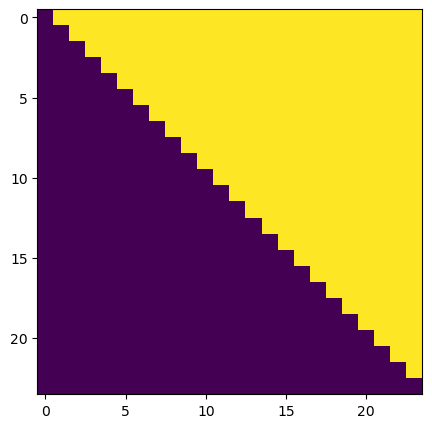

In [41]:
test_sent = '왜들 그리 다운돼있어? 뭐가 문제야 say something 분위기가 겁나 싸해'
test_tensor = kor_tokenizer.encode(test_sent)
test_tensor = torch.LongTensor(test_tensor.ids).to(device).unsqueeze(0)

plt.figure(figsize=(5,5))
plt.imshow(create_subsequent_mask(test_tensor).cpu()[0])

In [42]:
def create_src_mask(src):
    " source = [배치 사이즈, 소스 문장 길이] "

    src_len = src.size(1)
    
    src_mask = (src == pad_idx)
    # src_mask = [배치 사이즈, 소스 문장 길이]
    
    src_mask = src_mask.unsqueeze(1).repeat(1, src_len, 1)
    # src_mask = [배치 사이즈, 소스 문장 길이, 소스 문장 길이]

    return src_mask.to(device)


def create_tgt_mask(src, tgt):
    " src = [배치 사이즈, 소스 문장 길이] "
    " tgt = [배치 사이즈, 타겟 문장 길이] "
    
    batch_size, tgt_len = tgt.size()
    
    subsequent_mask = create_subsequent_mask(tgt)
    
    enc_dec_mask = (src == pad_idx)
    tgt_mask = (tgt == pad_idx)
    # src_mask = [배치 사이즈, 소스 문장 길이]
    # tgt_mask = [배치 사이즈, 타겟 문장 길이]
    
    enc_dec_mask = enc_dec_mask.unsqueeze(1).repeat(1, tgt_len, 1).to(device)
    tgt_mask = tgt_mask.unsqueeze(1).repeat(1, tgt_len, 1).to(device)
    # src_mask = [배치 사이즈, 타겟 문장 길이, 소스 문장 길이]
    # tgt_mask = [배치 사이즈, 타겟 문장 길이, 타겟 문장 길이]

    tgt_mask = tgt_mask | subsequent_mask
    
    return enc_dec_mask, tgt_mask

소스 문장의 마스크 생성 예는 아래와 같습니다.

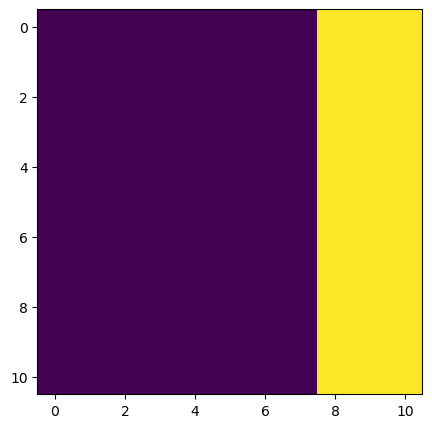

In [43]:
src = torch.tensor([[1, 2, 3, 4, 2, 11, 28, 7, 0, 0, 0]])
src_mask = create_src_mask(src)
plt.figure(figsize=(5,5))
plt.imshow(src_mask.cpu()[0])

타겟 문장의 마스크 생성 예는 아래와 같습니다.

In [44]:
tgt = torch.tensor([[1, 2, 3, 4, 2, 11, 28, 7, 99, 987, 1024, 0, 0]])
enc_dec_mask, tgt_mask = create_tgt_mask(src, tgt)

아래 그림은 타겟 문장이 소스 문장에 Attention을 취할 때 [PAD] 토큰이 마스킹 되는 예입니다.

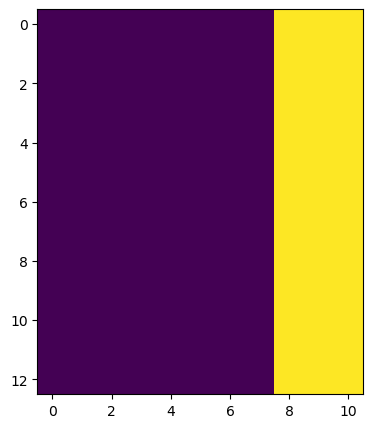

In [45]:
plt.figure(figsize=(5,5))
plt.imshow(enc_dec_mask.cpu()[0])

아래 예는 타겟 문장에서 Self-Attention 연산이 취해질 때 타임 스텝 상 뒤에 위치하는 토큰들과 [PAD] 토큰들이 마스킹 되는 예입니다.

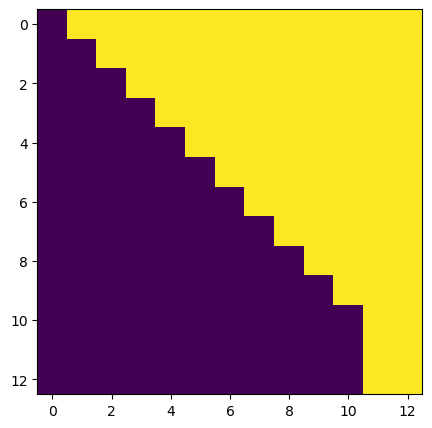

In [46]:
plt.figure(figsize=(5,5))
plt.imshow(tgt_mask.cpu()[0])

## 5-2. Position-wise Feed-Forward 네트워크 구현

![](img/positionwise.png)

In [51]:
## 5-2. Position-wise Feed-Forward 네트워크 구현
class PositionwiseFeedForward(nn.Module):
    '''포지션 와이즈 피드 포워드 레이어'''
    def __init__(self, parmas):
        super(PositionwiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(params['hidden_dim'], params['ffn_dim'])
        self.fc2 = nn.Linear(params['ffn_dim'], params['hidden_dim'])
        self.dropout = nn.Dropout(params['dropout'])
    
    def forward(self, x):
        " x = [배치 사이즈, 문장 길이, 은닉 차원] "
    
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

## 5-3. Positional Encoding 레이어 구현

![](img/pos.png)

In [52]:
class PositionalEncoding(nn.Module):
    def __init__(self, params):
        super(PositionalEncoding, self).__init__()
        sinusoid = np.array([pos / np.power(10000, 2 * i / params['hidden_dim'])
                            for pos in range(params['max_len']) for i in range(params['hidden_dim'])])
        # sinusoid = [문장 최대 길이 * 은닉 차원]

        sinusoid = sinusoid.reshape(params['max_len'], -1)
        # sinusoid = [문장 최대 길이, 은닉 차원]

        sinusoid[:, 0::2] = np.sin(sinusoid[:, 0::2])
        sinusoid[:, 1::2] = np.cos(sinusoid[:, 1::2])
        sinusoid = torch.FloatTensor(sinusoid).to(device)

        self.embedding = nn.Embedding.from_pretrained(sinusoid, freeze=True)
        
    def forward(self, x):
        " x = [배치 사이즈, 문장 길이] "
        
        pos = torch.arange(x.size(-1), dtype=torch.long).to(device)
        # pos = [배치 사이즈, 문장 길이]

        embed = self.embedding(pos)
        # embed = [배치 사이즈, 문장 길이, 은닉 차원]
        return embed

## 5-4. Transformer 인코더 부 구현

![](img/encoder.png)

In [53]:
class EncoderLayer(nn.Module):
    '''인코더 레이어'''
    def __init__(self, params):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(params)
        self.layer_norm1 = nn.LayerNorm(params['hidden_dim'])
        self.feed_forward = PositionwiseFeedForward(params)
        self.layer_norm2 = nn.LayerNorm(params['hidden_dim'])
        self.dropout = nn.Dropout(params['dropout'])
        
    def forward(self, x, src_mask):
        " x = [배치 사이즈, 문장 길이, 은닉 차원] "
        
        residual = x
        x, _ = self.self_attn(x, x, x, src_mask)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm1(x)
        
        residual = x
        x = self.feed_forward(x)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm2(x)
        
        return x


class Encoder(nn.Module):
    '''트랜스포머 인코더'''
    def __init__(self, params):
        super(Encoder, self).__init__()
        self.tok_embedding = nn.Embedding(params['vocab_size'], params['hidden_dim'], padding_idx=pad_idx)
        self.pos_embedding = PositionalEncoding(params)
        self.layers = nn.ModuleList([EncoderLayer(params) for _ in range(params['num_layers'])])
        
    def forward(self, src):
        " src = [배치 사이즈, 소스 문장 길이] "

        src_mask = create_src_mask(src)
        src = self.tok_embedding(src) + self.pos_embedding(src)
        
        for layer in self.layers:
            src = layer(src, src_mask)
            
        # src = [배치 사이즈, 소스 문장 길이, 은닉 차원]
        return src

## 5-5. Transformer 인코더 부 구현

![](img/decoder.png)

In [54]:
class DecoderLayer(nn.Module):
    '''디코더 레이어'''
    def __init__(self, params):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(params)
        self.layer_norm1 = nn.LayerNorm(params['hidden_dim'])

        self.enc_dec_attn = MultiHeadAttention(params)
        self.layer_norm2 = nn.LayerNorm(params['hidden_dim'])
        
        self.feed_forward = PositionwiseFeedForward(params)
        self.layer_norm3 = nn.LayerNorm(params['hidden_dim'])
        
        self.dropout = nn.Dropout(params['dropout'])
        
    def forward(self, x, tgt_mask, enc_output, src_mask):
        " x = [배치 사이즈, 문장 길이, 은닉 차원] "
        
        residual = x
        x, _ = self.self_attn(x, x, x, tgt_mask)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm1(x)
        
        residual = x
        x, attn_map = self.enc_dec_attn(x, enc_output, enc_output, src_mask)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm2(x)
        
        residual = x
        x = self.feed_forward(x)
        x = self.dropout(x)
        x = residual + x
        x = self.layer_norm3(x)
        
        return x, attn_map


class Decoder(nn.Module):
    '''트랜스포머 디코더'''
    def __init__(self, params):
        super(Decoder, self).__init__()
        self.tok_embedding = nn.Embedding(params['vocab_size'], params['hidden_dim'], padding_idx=pad_idx)
        self.pos_embedding = PositionalEncoding(params)
        self.layers = nn.ModuleList([DecoderLayer(params) for _ in range(params['num_layers'])])
        
    def forward(self, tgt, src, enc_out):
        " tgt = [배치 사이즈, 타겟 문장 길이] "

        src_mask, tgt_mask = create_tgt_mask(src, tgt)
        tgt = self.tok_embedding(tgt) + self.pos_embedding(tgt)
        
        for layer in self.layers:
            tgt, attn_map = layer(tgt, tgt_mask, enc_out, src_mask)
            
        tgt = torch.matmul(tgt, self.tok_embedding.weight.transpose(0, 1))
        # tgt = [배치 사이즈, 타겟 문장 길이, 은닉 차원]

        return tgt, attn_map

## 5-6. Transformer 구현

이제 앞서 정의한 레이어들을 토대로 **Transformer** 모델을 빌드해줍니다.

In [55]:
class Transformer(nn.Module):
    '''트랜스포머 네트워크'''
    def __init__(self, params):
        super(Transformer, self).__init__()
        self.encoder = Encoder(params)
        self.decoder = Decoder(params)
    
    def forward(self, src, tgt):
        " src = [배치 사이즈, 소스 문장 길이] "
        " tgt = [배치 사이즈, 타겟 문장 길이] "
        
        enc_out = self.encoder(src)
        dec_out, attn = self.decoder(tgt, src, enc_out)
        return dec_out, attn
    
    def count_params(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)

Transformer 에서는 Adam Optimizer에 일부 스케줄 옵션을 적용해 사용하고 있습니다.

## 5-7. Transformer Optimizer 구현

![](img/optim.png)

In [56]:
class ScheduledOptim:
    '''스케줄 옵티마이저'''
    def __init__(self, optimizer, warmup_steps):
        self.init_lr = np.power(params['hidden_dim'], -0.5)
        self.optimizer = optimizer
        self.step_num = 0
        self.warmup_steps = warmup_steps
    
    def step(self):
        self.step_num += 1
        lr = self.init_lr * self.get_scale()
        
        for p in self.optimizer.param_groups:
            p['lr'] = lr
            
        self.optimizer.step()
    
    def zero_grad(self):
        self.optimizer.zero_grad()
    
    def get_scale(self):
        return np.min([
            np.power(self.step_num, -0.5),
            self.step_num * np.power(self.warmup_steps, -1.5)
        ])

## 6. 모델 학습

In [58]:
from tqdm.auto import tqdm

# 모델 정의
model = Transformer(params)
model.to(device)
print(f'The model has {model.count_params():,} trainable parameters')

# 로스 함수 정의
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
criterion.to(device)

# 옵티마이저 정의
optimizer = ScheduledOptim(
    optim.Adam(model.parameters(), betas=[0.9, 0.98], eps=1e-9),
    warmup_steps=4000
)

# 훈련 로직
for epoch in range(params['num_epoch']):
    model.train()
    epoch_loss = 0
    
    # tqdm을 사용하여 진행바 추가
    for src, tgt in tqdm(zip(src_iter, tgt_iter), total=len(src_iter)):
        " src = [배치 사이즈, 소스 문장 길이] "
        " tgt = [배치 사이즈, 타겟 문장 길이] "
        
        optimizer.zero_grad()
        
        logits, _ = model(src, tgt[:, :-1])
        # logits = [배치 사이즈, 타겟 문장 길이, 은닉 차원]
        
        logits = logits.contiguous().view(-1, logits.size(-1))
        # logits = [(배치 사이즈 * 타겟 문장 길이) - 1, 은닉 차원]
        golds = tgt[:, 1:].contiguous().view(-1)
        # golds = [(배치 사이즈 * 타겟 문장 길이) - 1]

        loss = criterion(logits, golds)
        epoch_loss += loss.item()
        
        loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), self.params.clip)
        optimizer.step()

    train_loss = epoch_loss / len(src_iter)  # self.train_iter를 src_iter로 변경
    
    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f}')


The model has 64,618,496 trainable parameters


  0%|          | 0/6250 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Epoch: 01 | Train Loss: 10.570


  0%|          | 0/6250 [00:00<?, ?it/s]

Epoch: 02 | Train Loss: 7.794


  0%|          | 0/6250 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 7. 학습 결과 확인

이제 학습된 모델이 어느 정도 성능을 보이는지 확인해 볼 차례입니다.

In [ ]:
def predict():
    model.eval()

### 참고자료
- [The Annotated Transformer](https://nlp.seas.harvard.edu/2018/04/03/attention.html)
- [jadore801120/attention-is-all-you-need-pytorch](https://github.com/jadore801120/attention-is-all-you-need-pytorch)
- [tunz/transformer-pytorch](https://github.com/tunz/transformer-pytorch)
- [IgorSusmelj/pytorch-styleguide](https://github.com/IgorSusmelj/pytorch-styleguide)


### TODO: 더 추가할 수 있는 것들 !
- **Beam Search** 디코딩 추가
- **Label Smoothing** 기법 추가